In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,155350.0,1.692558,-0.683299,-0.828447,1.107049,-0.122735,0.470620,-0.335619,0.185138,0.791440,0.285202,-0.276464,0.283632,-0.729809,0.379739,-0.040668,0.855577,-1.178863,0.684490,0.167290,0.022490,-0.151254,-0.719510,0.129174,-1.255650,-0.370094,-0.940293,0.017477,-0.023034,154.00,0
1,44895.0,0.012152,-1.455185,-0.767147,1.650295,-0.392636,0.127562,0.686100,0.029960,-0.206460,-0.584509,1.470520,0.151597,-0.912689,-0.418037,0.884949,0.768840,0.449011,0.762987,-0.740331,1.028503,0.261751,-0.605181,-0.550574,-0.423208,0.194550,-0.475326,-0.067439,0.138489,594.64,0
2,87694.0,-5.210295,4.916165,-3.063086,-3.137821,1.422862,-0.653995,2.342638,-1.089480,5.516694,9.008699,0.685205,-1.155671,-2.328039,-1.833866,0.066205,-1.158140,-1.730954,0.061543,-0.263387,3.635146,-0.875794,0.252991,-0.175645,-0.466692,0.933246,0.061088,2.140386,0.469747,0.77,0
3,49717.0,1.077482,-1.200155,-0.847116,-0.861783,-0.030056,0.774165,-0.207865,0.064585,-0.926547,0.670747,-0.405160,0.041336,0.125005,0.235264,-0.314500,-1.353234,-0.265512,1.274301,0.060478,-0.098993,-0.372450,-0.897202,-0.364517,-1.661084,0.483215,1.192319,-0.095543,-0.000973,194.98,0
4,107396.0,-0.065234,0.484980,2.041105,-0.063453,-0.742723,-0.721074,0.060485,-0.071856,1.925223,-1.287062,0.865689,-1.498490,2.609747,0.910371,-0.431507,0.042331,0.267799,0.164484,-1.129888,-0.132013,0.086376,0.629758,0.182024,0.818588,-0.751102,-0.583497,0.107438,0.075418,30.24,0


In [3]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


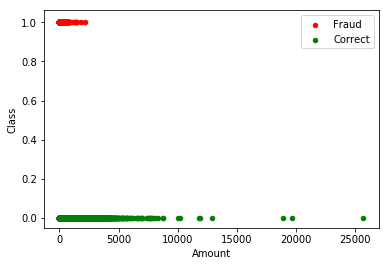

In [5]:
ax = fraud.plot.scatter(x='Amount', y='Class', c='Red', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', c='Green', label='Correct', ax=ax)
plt.show()

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print(logistic.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9990028369989608


In [8]:
y_prediction = np.array(logistic.predict(X_test))
print(y_prediction)

[0 0 0 ... 0 0 0]
